In [1]:
#Importing requisite libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib
%matplotlib inline 

Using matplotlib backend: <object object at 0x000001A19D03B740>


In [2]:
#Import the dataset
df_brazil=pd.read_csv('brazil_data.csv')

In [3]:
#Checking data
df_brazil.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df_brazil.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
#checking for null values in the dataset.
df_brazil.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df_brazil.shape
#dataframe has 110527 rows and 14 columns

(110527, 14)

In [7]:
#checking for duplicates 
df_brazil.duplicated().sum()

0

In [8]:
df_brazil.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df_brazil.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [10]:
df_brazil.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
#checking for duplicated patientID
df_brazil['PatientId'].duplicated().sum()
#attributed to the patients booking multiple appointments

48228

In [13]:
#checking for duplicated AppointmentID
df_brazil['AppointmentID'].duplicated().sum()
#unique IDs none was repeated as it was unique ID

0

### Data Cleaning

In [14]:
# A number of gaps were seen with the data. In this step we will clean the data and make it ready for analyis


In [15]:
#renaming columns that had been misspelt.
df_brazil.rename(columns={'Hipertension': 'Hypertension','Handcap':'Handicap'},inplace=True)
df_brazil.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [16]:
#Removing Negative Ages if any by multiplying by -1
df_brazil[df_brazil['Age'] < 0]
df_brazil['Age']=df_brazil['Age'].apply(lambda x: x*-1 if x < 0 else x)
df_brazil[df_brazil['Age'] < 0]
df_brazil.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [17]:
#changing datatypes of ScheduledDay and AppointmentDay
df_brazil['AppointmentDay']=pd.to_datetime(df_brazil['AppointmentDay'])
df_brazil['ScheduledDay']=pd.to_datetime(df_brazil['ScheduledDay'])
defr=df_brazil['AppointmentDay']-df_brazil['ScheduledDay']

In [18]:
#lowercasing column names and removing '-' replacing with '_'
df_brazil.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [19]:
#renaming the columns 'patientid','appointmentid','scheduledday','appointmentday'
df_brazil.rename(columns={'patientid':'patient_id','appointmentid':'appointment_id','scheduledday':'scheduled_day','appointmentday':'appointment_day'},inplace=True)
df_brazil.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [20]:
#Data is now consistent and ready for analysis. we proceed to the next stage which is Exploratory data analysis.

## Exploratory Data Analysis
Now that the data is clean and ready for use for analysis we will proceed to answer questions we had been asked earlier on regarding the data.
We will compute some of those statistics and use visualizations to represent our data

1. What is the proportion of patients who missed their appointments?

In [21]:

appointments=df_brazil.groupby(['no_show'])['no_show'].count().to_frame()
appointments

,no_show
no_show,
No,88208
Yes,22319


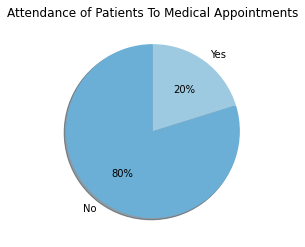

In [22]:
cmap=plt.get_cmap('tab20c')
color=cmap(np.array([1,2,5,6,9,10]))
plt.pie(appointments.no_show,colors=color,labels=appointments.index,startangle=90,autopct="%1.0f%%",explode=None,shadow=True)
plt.title("Attendance of Patients To Medical Appointments")
plt.show()

From the above chart we can see 20% which transalates to 22,319 patients missing their appointments. 80% of the patients attended their appointments which translates to 88,209 patients.
This understanding is premised on the fact that in the no_show column,'Yes' meansthe patient does not show and 'No' is that the patient shows up for the appointment.

 2. Did the scholarships affect attendance of medical appointments
##### The scholarship is called Bolsa Família (Meaning; Family Allowance) is a social protection program of the Government of Brazil, part of network of federal assistance programs. Bolsa Família provided financial aid to poor Brazilian families. In order to be eligible, families had to ensure that children attend school and get vaccinated. A great initiative that was a major factor contributing to the reduction of poverty in Brazil, which fell 27.7% during the first term in the administration of Lula.

Text(0.5, 0, 'Status')

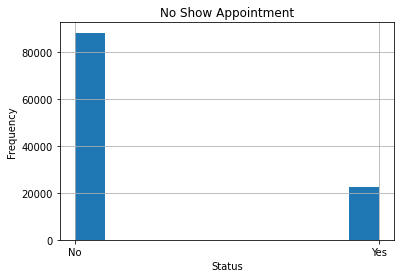

In [23]:
#exploring the no_show column
df_brazil.no_show.hist()
plt.title('No Show Appointment')
plt.ylabel('Frequency')
plt.xlabel('Status')

In [24]:
df_brazil.no_show.value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

Text(0.5, 0, 'Status')

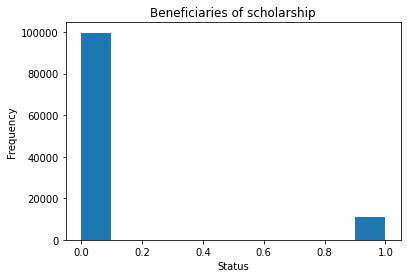

In [25]:
#exploring the scholariships column
df_brazil.scholarship.plot(kind='hist',title='Beneficiaries of scholarship')
plt.ylabel('Frequency')
plt.xlabel('Status')

In [26]:
#count of scholarship beneficiaries
df_brazil.scholarship.value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

In [27]:
#proceed to group by 'no_show' and see the way it relates to the scholarship column
df_brazil.groupby('no_show').scholarship.value_counts()

no_show  scholarship
No       0              79925
         1               8283
Yes      0              19741
         1               2578
Name: scholarship, dtype: int64

From the above we can see the total number of scholarship beneficiaries is 10,861.
This translates to 10.1765% of the total number of patients.

Text(0.5, 0, 'Status of patient')

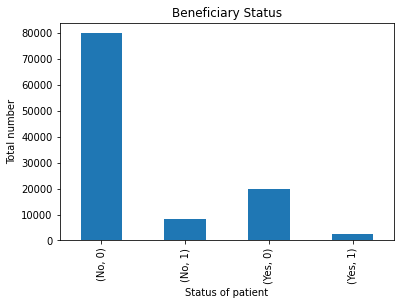

In [28]:
#plotting graphs to show the relationship better
df_brazil.groupby('no_show').scholarship.value_counts().plot(kind='bar',title='Beneficiary Status')
plt.ylabel('Total number')
plt.xlabel('Status of patient')

We had made an earlier assumption on the no_show columns that: 'No' means the patient does show and 'Yes' means that the patient doesn't show. For the scholarships, "0" means not a beneficary and "1" indicates the patient is a beneficiary of the scholarship.

We can see that a total of 8283 patients out of the 10861 beneficiaries showed up for their appointment.That means more than half of the beneficiaries showed up for their appointment.
This implies then that the Bolsa Familia social protection program improved attendance of medical appointments by patients.

### 3. What is the proportion of women and men who have benefitted from the scholarship?

In [29]:
df_brazil.groupby('scholarship').gender.value_counts()

scholarship  gender
0            F         62987
             M         36679
1            F          8853
             M          2008
Name: gender, dtype: int64

Text(0.5, 0, 'Gender and Beneficiary Status')

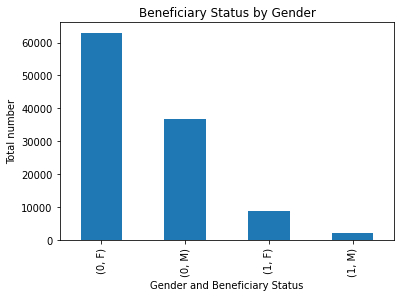

In [30]:
df_brazil.groupby('scholarship').gender.value_counts().plot(kind='bar',title='Beneficiary Status by Gender')
plt.ylabel('Total number')
plt.xlabel('Gender and Beneficiary Status')

From this we can see that 62,987 women failed to get the government social protection support this is vis a vis 36,679 men; while 8,853 (8.01%) men vis a vis 2008(1.817%) men got the governemt social protection support. We can thus deduce that more women than men got government social support protection program. The total number of people who got into the government support program was still low and might need to be improved.

3. How did diagnosis/medical condition and medical appointment attendance compare?

In [31]:
df_brazil.groupby('no_show').hypertension.value_counts()

no_show  hypertension
No       0               70179
         1               18029
Yes      0               18547
         1                3772
Name: hypertension, dtype: int64

Text(0.5, 0, 'Condition and Appointment Attendance-Hypertension')

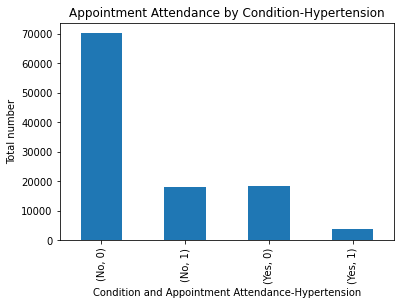

In [32]:
#Hypertension
df_brazil.groupby('no_show').hypertension.value_counts().plot(kind='bar',title='Appointment Attendance by Condition-Hypertension')
plt.ylabel('Total number')
plt.xlabel('Condition and Appointment Attendance-Hypertension')

In [33]:
#Diabetes
df_brazil.groupby('no_show').diabetes.value_counts()

no_show  diabetes
No       0           81695
         1            6513
Yes      0           20889
         1            1430
Name: diabetes, dtype: int64

Text(0.5, 0, 'Condition and Appointment Attendance-Diabetes')

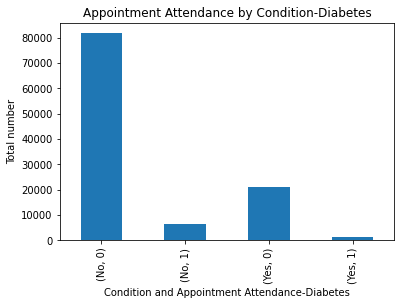

In [40]:
df_brazil.groupby('no_show').diabetes.value_counts().plot(kind='bar',title='Appointment Attendance by Condition-Diabetes')
plt.ylabel('Total number')
plt.xlabel('Condition and Appointment Attendance-Diabetes')

In [37]:
#Alcoholism
df_brazil.groupby('no_show').alcoholism.value_counts()

no_show  alcoholism
No       0             85525
         1              2683
Yes      0             21642
         1               677
Name: alcoholism, dtype: int64

Text(0.5, 0, 'Condition and Appointment Attendance-Alcoholism')

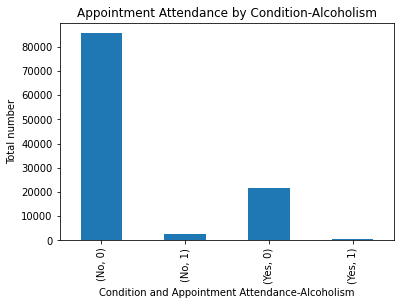

In [39]:
df_brazil.groupby('no_show').alcoholism.value_counts().plot(kind='bar',title='Appointment Attendance by Condition-Alcoholism')
plt.ylabel('Total number')
plt.xlabel('Condition and Appointment Attendance-Alcoholism')

explain the results above

70,179 patients without hypertension showed up for their medical appointments; this is a plus for preventive healthcare as such patients can be seen early and danger signs caught early; with 18,029 patients who are hypertensive showed up for their appointments. This corresponds to  82.6980% of total number of hypertesnive patients who attended their medical appointment and 3,772 hypertensive patients who missed their appointments and were hypertensive. This corresponds to 17.302% of the total number of hypertensive patients
We can then make a generalization from the data presented to us that the health seeking behaviour is good as most seek preventive care. Also a smaller propotion of hypertensive patients skip their appointments.
The target for interventions should then target the non-hypertensives and hypertensive patients who miss their appointments.
The same trend is realized with diabetes.
Interventions should be targeted at people with these ailments and miss their appointments and those at risk of progressing to them to get treatment.

## 4. What is the disease/condition burden by gender?

In [41]:
#Diabetes
df_brazil.groupby('diabetes').gender.value_counts()

diabetes  gender
0         F         66234
          M         36350
1         F          5606
          M          2337
Name: gender, dtype: int64

Text(0.5, 0, 'Diabetes Burden By Gender')

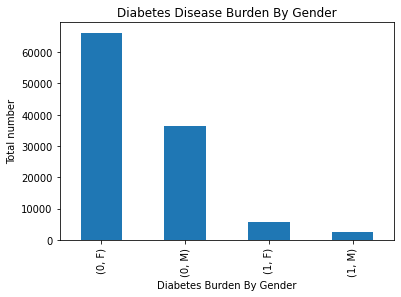

In [42]:
df_brazil.groupby('diabetes').gender.value_counts().plot(kind='bar',title='Diabetes Disease Burden By Gender')
plt.ylabel('Total number')
plt.xlabel('Diabetes Burden By Gender')

In [47]:
df_brazil.groupby('hypertension').gender.value_counts()

hypertension  gender
0             F         56501
              M         32225
1             F         15339
              M          6462
Name: gender, dtype: int64

Text(0.5, 0, 'Hypertension Burden By Gender')

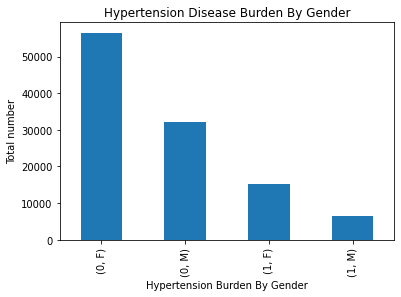

In [44]:
df_brazil.groupby('hypertension').gender.value_counts().plot(kind='bar',title='Hypertension Disease Burden By Gender')
plt.ylabel('Total number')
plt.xlabel('Hypertension Burden By Gender')

In [46]:
df_brazil.groupby('alcoholism').gender.value_counts()

alcoholism  gender
0           F         70617
            M         36550
1           M          2137
            F          1223
Name: gender, dtype: int64

Text(0.5, 0, 'Alcoholism Burden By Gender')

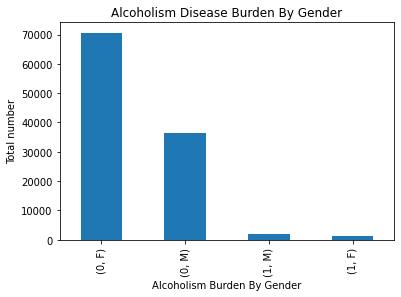

In [45]:
df_brazil.groupby('alcoholism').gender.value_counts().plot(kind='bar',title='Alcoholism Disease Burden By Gender')
plt.ylabel('Total number')
plt.xlabel('Alcoholism Burden By Gender')

There is a higher proportion of women (5606) with diabetes than men (2337).
The same is replicated with hypertension with 15,339 women and 6,462 men.
Alcoholism on the other hand affected more men than women 2137 men and 1223 women.

### 5. Does receipt of sms affect appointment attendance?

In [63]:
df_brazil.groupby('sms_received').no_show.value_counts()

sms_received  no_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: no_show, dtype: int64

Text(0.5, 0, 'No Show By sms_received')

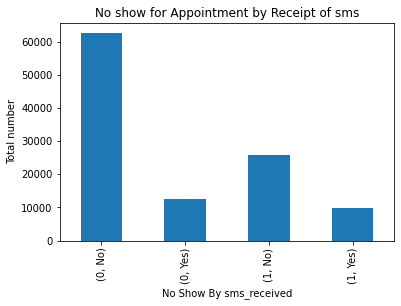

In [65]:
df_brazil.groupby('sms_received').no_show.value_counts().plot(kind='bar',title='No show for Appointment by Receipt of sms')
plt.ylabel('Total number')
plt.xlabel('No Show By sms_received')

A total of 22,319 patients missed their appointments
12,535 never received a text reminding them of their appointment and never showed up for their appoinments accounting for 56.13% of the total missed appointments; while 9,784 missed appoinments and received messages accounting for 43.87% of the total number of missed appoinments.

## 6. Patient Stratification By Gender

In [53]:
appp=df_brazil.groupby(['gender'])['gender'].count().to_frame()
appp

,gender
gender,
F,71840
M,38687


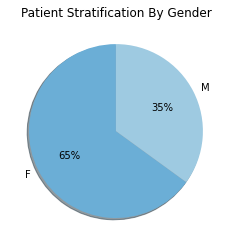

In [55]:
cmap=plt.get_cmap('tab20c')
color=cmap(np.array([1,2,5,6,9,10]))
plt.pie(appp.gender,colors=color,labels=appp.index,startangle=90,autopct="%1.0f%%",explode=None,shadow=True)
plt.title("Patient Stratification By Gender")
plt.show()

from the above we can see that we had a greater percentage of women patients,65% compared to 35% of men.
Messaging should be targeted at men to improve their health seeking behaviour.

In [60]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df_brazil)
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


In [67]:
profile.to_file('Analysis.html')
#saving profile report to a pdf file.

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 64.60it/s]


### Conclusion
I used the no show appointments dataset for my analysis and worked with the all the columns. My analysis is limited to only the provided dataset.Therefore all my results in this analysis is restricted to this dataset alone and not the entire population. Some of the recommendations made however can be extrapolated to the whole population.
I also profiled the dataset and the profile report is containded within the notebook.
I faced a number of challenges in this analysis chiefly being 'scholarship','hypertension' and 'alcoholism' columns which came in '0' and '1'; and handicap 0-4, it was not clearly stated what they stood for so I made assumptions to carry out my analysis. The 'no_show' column came in a 'yes' and 'no' format which was not explicit. I assumed 'no' to mean patient does show and 'yes' to mean patient does not show.